In [352]:
import pandas as pd
import datetime
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import plot_partial_dependence
import collections
import seaborn as sns
import pickle as pkl
import shap
from shap import sample

In [353]:
sf = pd.read_csv('ca_san_francisco_2020_04_01.csv')

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.


In [354]:
sf.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_stop',
       'raw_search_vehicle_description', 'raw_result_of_contact_description'],
      dtype='object')

In [355]:
sf_lean = sf.drop(['raw_row_number','date', 'time', 'location', 'lat', 'lng', 'district','type','citation_issued','warning_issued','contraband_found','search_vehicle','search_basis','arrest_made','reason_for_stop','raw_search_vehicle_description', 'raw_result_of_contact_description','outcome'],axis=1)

In [356]:
sf_lean.columns

Index(['subject_age', 'subject_race', 'subject_sex', 'search_conducted'], dtype='object')

In [357]:
# Implement fixed width binning for age

In [358]:
bin_ranges = [0, 18, 35, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

In [359]:
sf_lean = sf_lean.dropna(axis=0,inplace=False)

In [360]:
sf_lean.subject_age.astype(int)

33159     56
33160     32
33161     57
33162     31
33163     37
          ..
886037    47
886038    55
886039    36
886040    50
886041    22
Name: subject_age, Length: 846182, dtype: int64

In [361]:
sf_lean['age_bin_custom_range'] = pd.cut(np.array(sf_lean['subject_age']),bins=bin_ranges)
sf_lean['age_bin_custom_label'] = pd.cut(np.array(sf_lean['subject_age']),bins=bin_ranges,labels=bin_names)

In [362]:
sf_lean.subject_age = sf_lean.age_bin_custom_label

In [363]:
# Encode race column

In [364]:
race_encoded = pd.get_dummies(sf_lean.subject_race, drop_first=True)
le = LabelEncoder()
race_encoded = pd.DataFrame(le.fit_transform(sf_lean.subject_race)).astype('category')

In [365]:
sf_lean.subject_race = race_encoded.astype('category')

In [366]:
sf_lean.subject_race.dtype

dtype('float64')

In [367]:
sf_lean.columns

Index(['subject_age', 'subject_race', 'subject_sex', 'search_conducted',
       'age_bin_custom_range', 'age_bin_custom_label'],
      dtype='object')

In [368]:
sf_lean.subject_sex = pd.get_dummies(sf_lean.subject_sex, drop_first=True)

In [369]:
sf_lean.dropna(inplace=True)

In [370]:
X = sf_lean[['subject_age','subject_race','subject_sex']]
y = sf_lean.search_conducted.dropna()

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [376]:
log_reg = LogisticRegression(penalty='l1',random_state=42,solver='liblinear',max_iter=1000)

In [377]:
log_reg.fit(X, y)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [378]:
log_reg.score(X,y)

0.9395097280511157

In [379]:
features = [0,1,2]

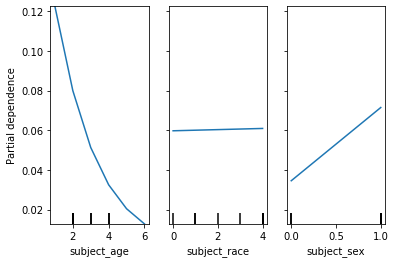

In [380]:
plot_partial_dependence(log_reg, X, features)